In [720]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [721]:
df = pd.read_csv('D:/mtech/framingham_dataset.csv')

In [722]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [723]:
#Find the Data correlation
corr = df.corr()

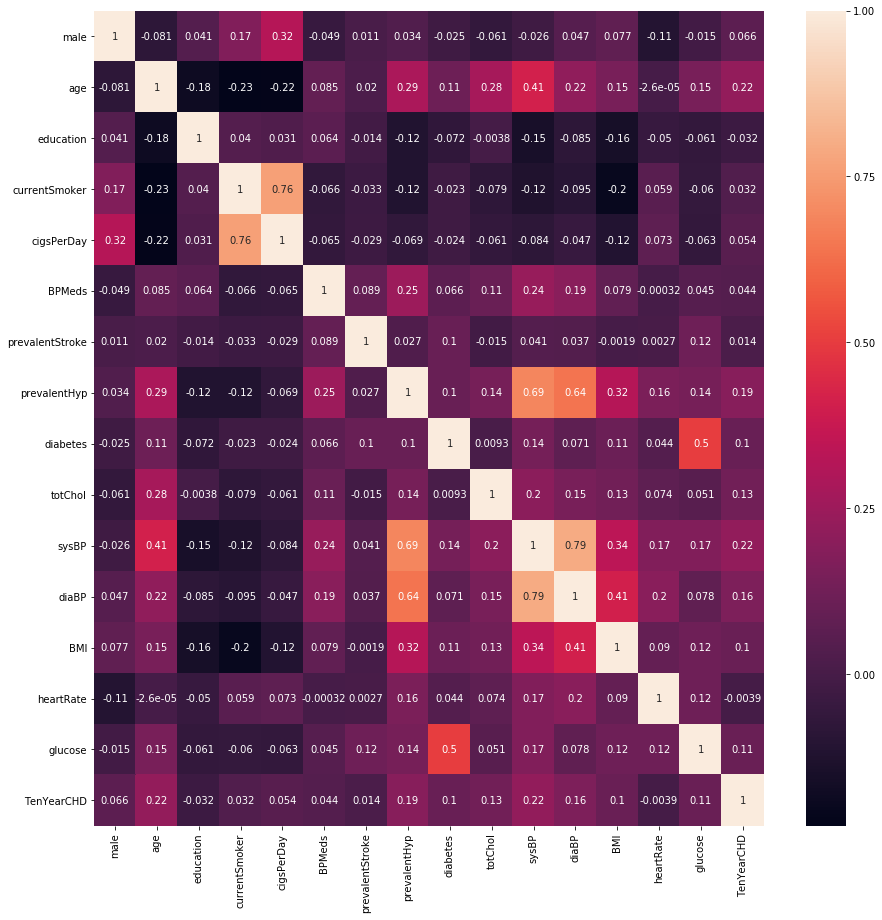

In [724]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr, annot = True, ax=ax)

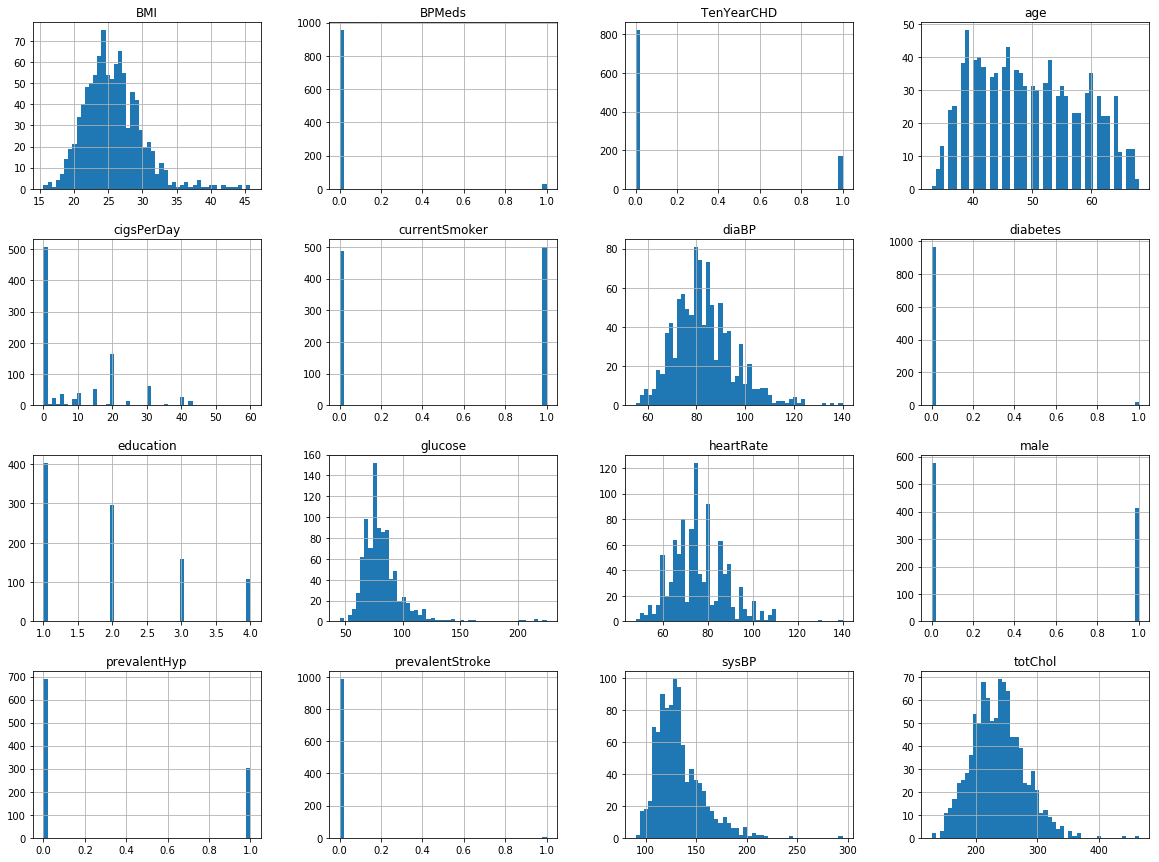

In [725]:
#Visualize the dataset
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [726]:
df.shape

(989, 16)

In [727]:
heart_data=df.drop(['education'], axis=1)

heart_data

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [728]:
heart_data.isnull().sum()

male                0
age                 0
currentSmoker       0
cigsPerDay          2
BPMeds             10
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            12
sysBP               0
diaBP               0
BMI                 3
heartRate           1
glucose            87
TenYearCHD          0
dtype: int64

In [729]:
count=0
for i in heart_data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_data.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  104
since it is only 11 percent of the entire dataset the rows with missing values are excluded.


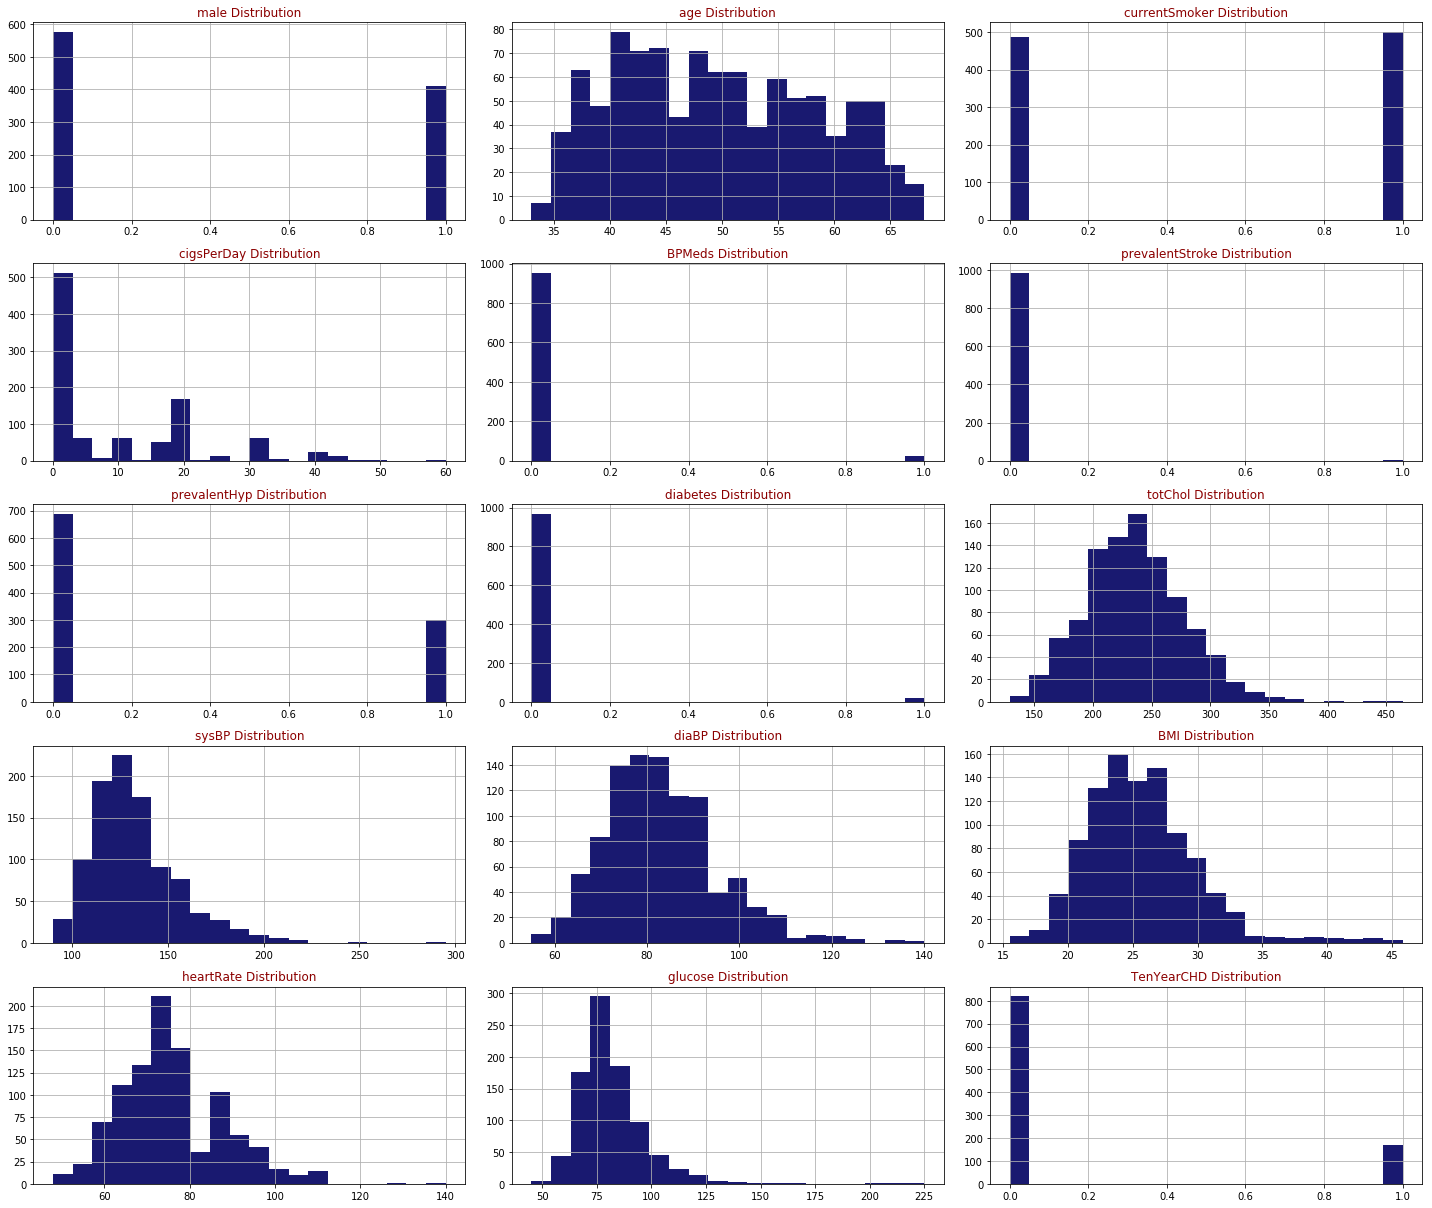

In [730]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_data,heart_data.columns,6,3)

In [731]:
heart_data.TenYearCHD.value_counts()

0    821
1    168
Name: TenYearCHD, dtype: int64

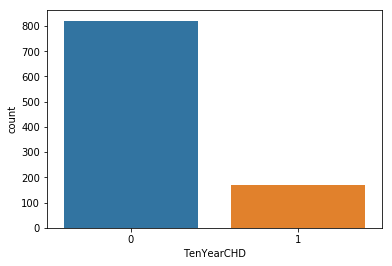

In [732]:
sn.countplot(x='TenYearCHD',data=heart_data)

In [733]:
heart_data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,989.000000,989.000000,989.000000,987.000000,979.000000,989.000000,989.000000,989.000000,977.000000,989.000000,989.000000,986.000000,988.000000,902.000000,989.000000
mean,0.416582,49.447927,0.506572,9.342452,0.026558,0.004044,0.304348,0.021234,235.981576,132.698180,82.913043,25.702292,75.989879,81.593126,0.169869
std,0.493242,8.778457,0.500210,12.122609,0.160869,0.063500,0.460363,0.144235,42.390187,22.688329,12.046113,4.258330,11.968716,17.650500,0.375707
min,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129.000000,90.000000,55.000000,15.540000,48.000000,45.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,207.000000,117.000000,74.500000,22.890000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,235.000000,128.000000,82.000000,25.260000,75.000000,78.000000,0.000000
75%,1.000000,57.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,261.000000,144.000000,90.000000,27.980000,83.000000,87.000000,0.000000
max,1.000000,68.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,464.000000,295.000000,140.000000,45.800000,140.000000,225.000000,1.000000


In [734]:
heart_data

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [735]:
# There are 29 records with 'cigsPerDay' and we will replace them with mean value
import math
mean_value=df['cigsPerDay'].mean()
mean_value = math.floor(mean_value)
heart_data['cigsPerDay']=df['cigsPerDay'].fillna(mean_value)

In [736]:
#Null values have been replaced by mean value
heart_data['cigsPerDay'].isnull().sum()

0

In [737]:
#Fill the null values in glucose column with mean value
mean_value=df['glucose'].mean()
heart_data['glucose']=df['glucose'].fillna(mean_value)

In [738]:
heart_data.isnull().sum()

male                0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds             10
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            12
sysBP               0
diaBP               0
BMI                 3
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [739]:
#fill the BPMeds column which has null values with mode
heart_data['BPMeds'].fillna(heart_data['BPMeds'].mode()[0], inplace=True)

In [740]:
#fill the heartRate column which has null values with mode
heart_data['heartRate'].fillna(heart_data['heartRate'].mode()[0], inplace=True)

In [741]:
heart_data.isnull().sum()

male                0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            12
sysBP               0
diaBP               0
BMI                 3
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [742]:
#fill the BMI column which has null values with median
heart_data['BMI'] = heart_data.fillna(heart_data['BMI'].median()) 

In [743]:
#fill the totChol column which has null values with mean
mean_value=heart_data['totChol'].mean()
heart_data['totChol']=heart_data['totChol'].fillna(mean_value)

In [744]:
heart_data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [745]:
#Imputation completed as we have no columns with null values in the data or records

In [746]:
#Let's create numpy arrays for features and target
X = heart_data.drop('TenYearCHD',axis=1)
y = heart_data['TenYearCHD'].values

In [747]:
X[0:2]

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,1.0,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,0.0,95.0,76.0


In [748]:
from sklearn.preprocessing import Normalizer

In [749]:
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

In [750]:
normalizedX[0:2]

array([[0.00383446, 0.14954388, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.74771939, 0.40645259,
        0.26841209, 0.00383446, 0.30675667, 0.2952533 ],
       [0.        , 0.14501664, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.7881339 , 0.38145681,
        0.25535538, 0.        , 0.29949088, 0.23959271]])

In [751]:
from sklearn.model_selection import train_test_split

In [752]:
X_train,X_test,y_train,y_test = train_test_split(normalizedX,y,test_size=0.2,random_state=42, stratify=y)

In [753]:
#We will SMOTE to work on oversampling of '0' in the dataset, We need to fit the model after balancing the classes
#in the dataset

In [754]:
from imblearn.over_sampling import SMOTE

In [755]:
#Befor we will SMOTE ,let us check the values of y_test

In [756]:
#y_train.value_counts()
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))


{0: 657, 1: 134}

In [757]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [758]:
#after SMOTE, let us check the values of y_test

In [759]:

unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 657, 1: 657}

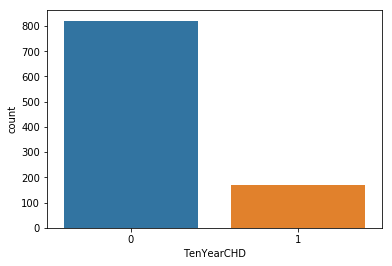

In [760]:
sn.countplot(x='TenYearCHD',data=heart_data)

In [761]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear',C=0.01)  
svclassifier.fit(X_train, y_train)  

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [762]:
y_pred = svclassifier.predict(X_test) 

In [763]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7727272727272727


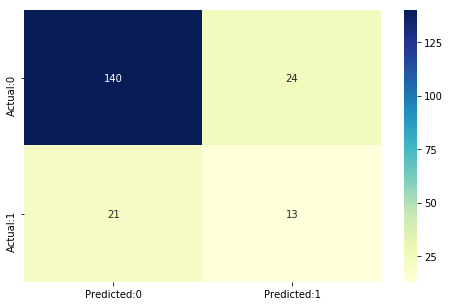

In [764]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [765]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly')  
svclassifier.fit(X_train, y_train)  

C:\Users\pc-pc\anaconda16\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [766]:
y_pred = svclassifier.predict(X_test) 

In [767]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778


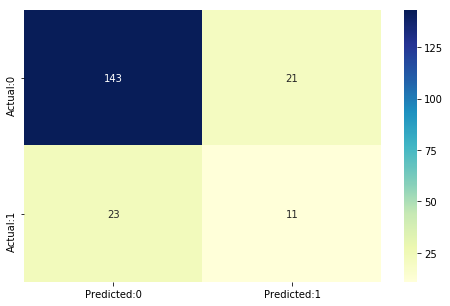

In [768]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [769]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

C:\Users\pc-pc\anaconda16\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [770]:
y_pred = svclassifier.predict(X_test) 

In [771]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7727272727272727


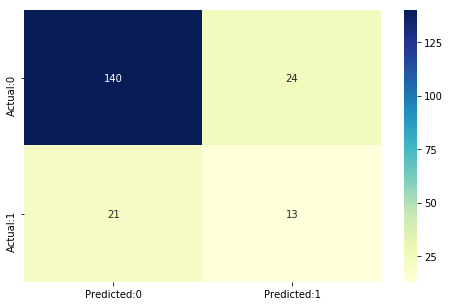

In [772]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [773]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train)  

C:\Users\pc-pc\anaconda16\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [774]:
y_pred = svclassifier.predict(X_test) 

In [775]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7727272727272727


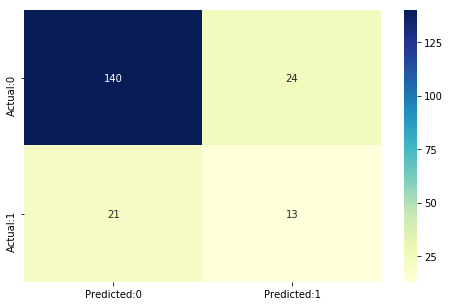

In [776]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")